# Exercice 3

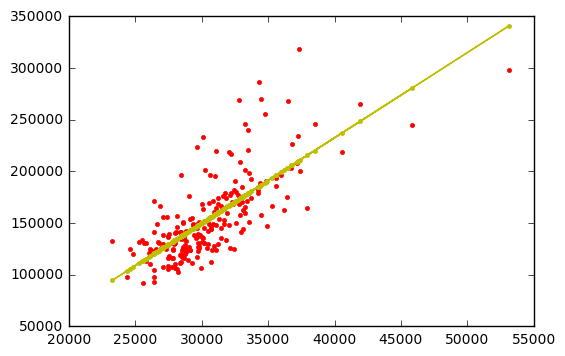

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy
%matplotlib inline

file='prix-immobilier-notaire-agglomeration_cle245eb4.xls'
df=pd.read_excel(file)

x1=df['Revenu imposable brut par ménage 2006'].values
x1=x1.reshape(-1,1)

y=df['Prix moyen par logement actualisé à 2006'].values


regr = linear_model.LinearRegression()
regr.fit(x1,y)
y_hat = regr.predict(x1)



plt.plot(x1,y,'r.')
plt.plot(x1,y_hat,'y.-')


plt.show()

# Exercice 3 regression multiple

Variance 1: 1.42607329884
Variance 2: 1.00554988429
Variance 3: 1.00369318699
intervalle de confiance 1: 251171.267347
intervalle de confiance 2: 304790.400985
intervalle de confiance 3: 457727.619735


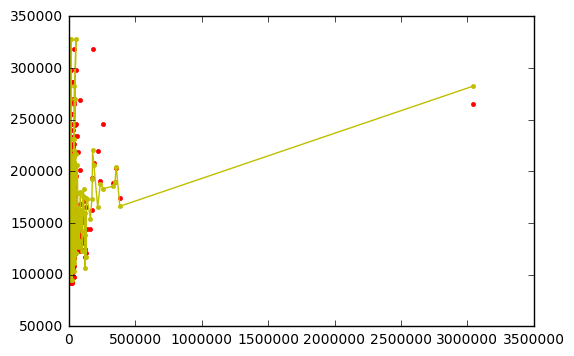

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy
%matplotlib inline

file='prix-immobilier-notaire-agglomeration_cle245eb4.xls'
df=pd.read_excel(file)

x1=df['Revenu imposable brut par ménage 2006'].values
x2=df['% de résidences secondaires'].values
x3=df['Nombre de ménages 2006'].values

y=df['Prix moyen par logement actualisé à 2006'].values

#calcul de la triple regression
x = np.array([x1,x2,x3])
x = np.transpose(x)
regr = linear_model.LinearRegression()
regr.fit(x,y)
y_hat = regr.predict(x)

#Calcul de la première varation par rapport à x1
regr1 = linear_model.LinearRegression()
x1 = x1.reshape(-1,1)
regr1.fit(x1,y)
Var1 = 1 / ( 1 - regr1.score(x1, y)**2)
print("Variance 1:",Var1)

#Calcul de la première varation par rapport à x2
regr2 = linear_model.LinearRegression()
x2 = x2.reshape(-1,1)
regr2.fit(x2,y)
Var2 = 1 / ( 1 - regr2.score(x2, y)**2)
print("Variance 2:",Var2)

#Calcul de la première varation par rapport à x3
regr3 = linear_model.LinearRegression()
x3 = x3.reshape(-1,1)
regr3.fit(x3,y)
Var3 = 1 / ( 1 - regr3.score(x3, y)**2)
print("Variance 3:",Var3)


#calcul de l'intervalle de confiance a 5% pour var1
n1=len(x1)
x1_bar = np.sum(x1)/n
x1_hat = regr1.predict(x1)
sigma1 = np.sqrt(np.sum((x1-x1_hat)**2)/n)
marge1 = 1.96 * sigma1 / np.sqrt(n)
print("intervalle de confiance 1:", marge1)

#calcul de l'intervalle de confiance a 5% pour var2
n2=len(x2)
x2_bar = np.sum(x2)/n
x2_hat = regr2.predict(x2)
sigma2 = np.sqrt(np.sum((x2-x2_hat)**2)/n)
marge2 = 1.96 * sigma2 / np.sqrt(n)
print("intervalle de confiance 2:", marge2)

#calcul de l'intervalle de confiance a 5% pour var3
n3=len(x3)
x3_bar = np.sum(x3)/n
x3_hat = regr3.predict(x3)
sigma3 = np.sqrt(np.sum((x3-x3_hat)**2)/n)
marge3 = 1.96 * sigma3 / np.sqrt(n)
print("intervalle de confiance 3:", marge3)


#print les différents graphes
plt.plot(x,y,'r.')
plt.plot(x,y_hat,'y.-')
plt.show()

Commentaire sur l'approximation de la regression linéaire simple:
A la vue du graphique on peut dire que la regression reste assez fidèle vis-à-vis de la réalité

Commentaire sur l'approximation de la regression linéaire multiple:
Le résultat n'est pas du tout représentatif du nuage de point. 